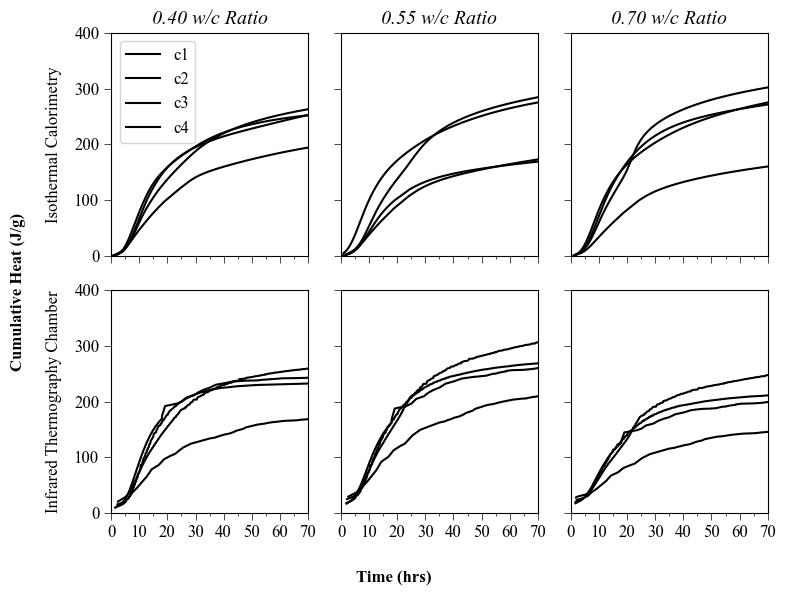

In [8]:
#Datasent Inforamtion
# What is the "name" of the dataset? Cement Paste Data
# Where did you obtain it? I collected the samples
# Where can we obtain it? (i.e., URL): Will be available after first publication.
# What is the license of the dataset? What are we allowed to do with it? None and do not share.
# How big is it in file size and in items? 4,853, "C:\Users\brandyd2\Downloads\231201_Infrared and Isothermal Data_Paste_Diggs_V14_Heat and Cumlative Heat Only.xlsx",  KB

import textwrap
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import MultipleLocator

def customize_ticks(ax, x_major, x_minor, y_major, y_minor):
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))
    ax.tick_params(axis='both', which='major', length=5, width=0.5, labelsize=12)
    ax.tick_params(axis='both', which='minor', length=2.5, width=0.5)
    return ax

plt.rc('font', family='Times New Roman', weight='regular', size=12)
lfs = 12

file_path = r'C:\Users\brandyd2\Downloads\231201_Infrared and Isothermal Data_Paste_Diggs_V14_Heat and Cumlative Heat Only.xlsx'
sheets = ['Trial 7_Complete_40_Isocal', 'Trial 7_Complete_55_Isocal', 'Trial 7_Complete_70_Isocal', 
          'Trial 7_Complete_40_Infrared', 'Trial 7_Complete_55_Infrared', 'Trial 7_Complete_70_Infrared']



plot_titles = ['0.40 w/c Ratio', '0.55 w/c Ratio', '0.70 w/c Ratio']
columns_for_plots = [
('Time-c1-iso40', 'Cumulative-c1-iso40', 'Time-c2-iso40', 'Cumulative-c2-iso40', 'Time-c3-iso40', 'Cumulative-c3-iso40', 'Time-c4-iso40', 'Cumulative-c4-iso40'),('Time-c1-iso55', 'Cumulative-c1-iso55', 'Time-c2-iso55', 'Cumulative-c2-iso55', 'Time-c3-iso55', 'Cumulative-c3-iso55', 'Time-c4-iso55', 'Cumulative-c4-iso55'), ('Time-c1-iso70', 'Cumulative-c1-iso70', 'Time-c2-iso70', 'Cumulative-c2-iso70', 'Time-c3-iso70', 'Cumulative-c3-iso70', 'Time-c4-iso70', 'Cumulative-c4-iso70'),
('Time-c1-ir40', 'Cumulative-c1-ir40', 'Time-c2-ir40', 'Cumulative-c2-ir40', 'Time-c3-ir40', 'Cumulative-c3-ir40', 'Time-c4-ir40', 'Cumulative-c4-ir40'),
('Time-c1-ir55', 'Cumulative-c1-ir55', 'Time-c2-ir55', 'Cumulative-c2-ir55', 'Time-c3-ir55', 'Cumulative-c3-ir55', 'Time-c4-ir55', 'Cumulative-c4-ir55'),
('Time-c1-ir70', 'Cumulative-c1-ir70', 'Time-c2-ir70', 'Cumulative-c2-ir70', 'Time-c3-ir70', 'Cumulative-c3-ir70', 'Time-c4-ir70', 'Cumulative-c4-ir70'),   
]
# Colors for each sample category
colors = {'Cumulative-c1-iso40': 'red', 'Cumulative-c2-iso40': 'blue', 'Cumulative-c3-iso40': '#ffd343', 
          'Cumulative-c4-iso40': 'green', 'Cumulative-c1-iso55': 'red', 'Cumulative-c2-iso55': 'blue', 'Cumulative-c3-iso55': '#ffd343', 
          'Cumulative-c4-iso55': 'green','Cumulative-c1-iso70': 'red', 'Cumulative-c2-iso70': 'blue', 'Cumulative-c3-iso70': '#ffd343', 
          'Cumulative-c4-iso70': 'green','Cumulative-c1-ir40': 'red', 'Cumulative-c2-ir40': 'blue', 
          'Cumulative-c3-ir40': '#ffd343', 'Cumulative-c4-ir40': 'green','Cumulative-c1-ir55': 'red', 'Cumulative-c2-ir55': 'blue', 
          'Cumulative-c3-ir55': '#ffd343', 'Cumulative-c4-ir55': 'green', 'Cumulative-c1-ir70': 'red', 'Cumulative-c2-ir70': 'blue', 
          'Cumulative-c3-ir70': '#ffd343', 'Cumulative-c4-ir70': 'green'}

fig, axes = plt.subplots(2, 3, figsize=(8, 6))

legend_labels = {'Cumulative-c1': 'C1', 'Cumulative-c2': 'C2', 'Cumulative-c3': 'C3', 'Cumulative-c4': 'C4'}
legend_colors = {'C1': 'red', 'C2': 'blue', 'C3': '#ffd343', 'C4': 'green'}

for i, sheet in enumerate(sheets):
    df = pd.read_excel(file_path, sheet_name=sheet)
    ax = axes[i // 3, i % 3]
    if i // 3 == 0:
        ax.set_title(plot_titles[i % 3], fontstyle='italic')

    time_columns = [col for col in columns_for_plots[i] if 'Time' in col]
    data_columns = [col for col in columns_for_plots[i] if 'Cumulative' in col]

    for time_col, data_col in zip(time_columns, data_columns):
        if time_col in df.columns and data_col in df.columns:
            # Extract the category (e.g., 'c1', 'c2', etc.) from the data column name
            category = data_col.split('-')[1].split('iso')[0].split('ir')[0]
            label = legend_labels.get(category, category)  # Get the label from legend_labels dictionary
            color = legend_colors.get(label, 'red', '')  # Get the color from legend_colors dictionary
            ax.plot(df[time_col], df[data_col], label=label, color=color)

    if i // 3 == 0 and i % 3 == 0:  # First row, first column
        ax.legend()

    # Set y-axis labels and tick labels
    if i % 3 == 0:  # Only for the first column of each row
        if i // 3 == 0:
            ax.set_ylabel('Isothermal Calorimetry', fontsize=lfs, rotation=90, labelpad=15, ha='center', va='center')
            ax.tick_params(axis='y', labelleft=True)  # Enable y-axis tick labels
        else:
            label_text=('Infrared Thermography Chamber')
            wrapped_label = textwrap.fill(label_text, width=0.1)  # Wrapping the text
            ax.set_ylabel(label_text, fontsize=lfs, rotation=90, labelpad=15, ha='center', va='center')
            ax.tick_params(axis='y', labelleft=True)  # Enable y-axis tick labels
    else:
        ax.set_ylabel('')  # Remove y-label for other columns
        ax.tick_params(axis='y', labelleft=False)  # Disable y-axis tick labels

    # Adjust x-axis tick labels
    if i // 3 == 1:  # Only for the second row
        ax.tick_params(axis='x', labelbottom=True)
    else:
        ax.tick_params(axis='x', labelbottom=False)

    ax = customize_ticks(ax, x_major=10, x_minor=5, y_major=100, y_minor=550)
    ax.set_xlim(0, 70)
    ax.set_ylim(0, 400)


fig.supxlabel('Time (hrs)', fontsize=lfs, weight='bold', color='k')
fig.supylabel('Cumulative Heat (J/g)', fontsize=lfs, weight='bold', color='k')

plt.tight_layout()

filename = os.path.join(r'C:\Users\brandyd2\Downloads', "Cumulative Heat Curve Nov 2023.png")
fig.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()


# import textwrap
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import MultipleLocator

def customize_ticks(ax, x_major, x_minor, y_major, y_minor):
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))
    ax.tick_params(axis='both', which='major', length=5, width=0.5, labelsize=12)
    ax.tick_params(axis='both', which='minor', length=2.5, width=0.5)
    return ax

plt.rc('font', family='Times New Roman', weight='regular', size=12)
lfs = 12

file_path = r'C:\Users\brandyd2\Downloads\231201_Infrared and Isothermal Data_Paste_Diggs_V14_Heat and Cumlative Heat Only.xlsx'
sheets = ['Trial 7_Complete_40_Isocal', 'Trial 7_Complete_55_Isocal', 'Trial 7_Complete_70_Isocal', 
          'Trial 7_Complete_40_Infrared', 'Trial 7_Complete_55_Infrared', 'Trial 7_Complete_70_Infrared']

plot_titles = ['0.40 w/c Ratio', '0.55 w/c Ratio', '0.70 w/c Ratio']



columns_for_plots = [
('Time-c1-iso40', 'Cumulative-c1-iso40', 'Time-c2-iso40', 'Cumulative-c2-iso40', 'Time-c3-iso40', 'Cumulative-c3-iso40', 'Time-c4-iso40', 'Cumulative-c4-iso40'),('Time-c1-iso55', 'Cumulative-c1-iso55', 'Time-c2-iso55', 'Cumulative-c2-iso55', 'Time-c3-iso55', 'Cumulative-c3-iso55', 'Time-c4-iso55', 'Cumulative-c4-iso55'), ('Time-c1-iso70', 'Cumulative-c1-iso70', 'Time-c2-iso70', 'Cumulative-c2-iso70', 'Time-c3-iso70', 'Cumulative-c3-iso70', 'Time-c4-iso70', 'Cumulative-c4-iso70'),
('Time-c1-ir40', 'Cumulative-c1-ir40', 'Time-c2-ir40', 'Cumulative-c2-ir40', 'Time-c3-ir40', 'Cumulative-c3-ir40', 'Time-c4-ir40', 'Cumulative-c4-ir40'),
('Time-c1-ir55', 'Cumulative-c1-ir55', 'Time-c2-ir55', 'Cumulative-c2-ir55', 'Time-c3-ir55', 'Cumulative-c3-ir55', 'Time-c4-ir55', 'Cumulative-c4-ir55'),
('Time-c1-ir70', 'Cumulative-c1-ir70', 'Time-c2-ir70', 'Cumulative-c2-ir70', 'Time-c3-ir70', 'Cumulative-c3-ir70', 'Time-c4-ir70', 'Cumulative-c4-ir70'),   
]
# Colors for each sample category
colors = {'Cumulative-c1-iso40': 'red', 'Cumulative-c2-iso40': 'blue', 'Cumulative-c3-iso40': '#ffd343', 
          'Cumulative-c4-iso40': 'green', 'Cumulative-c1-iso55': 'red', 'Cumulative-c2-iso55': 'blue', 'Cumulative-c3-iso55': '#ffd343', 
          'Cumulative-c4-iso55': 'green','Cumulative-c1-iso70': 'red', 'Cumulative-c2-iso70': 'blue', 'Cumulative-c3-iso70': '#ffd343', 
          'Cumulative-c4-iso70': 'green','Cumulative-c1-ir40': 'red', 'Cumulative-c2-ir40': 'blue', 
          'Cumulative-c3-ir40': '#ffd343', 'Cumulative-c4-ir40': 'green','Cumulative-c1-ir55': 'red', 'Cumulative-c2-ir55': 'blue', 
          'Cumulative-c3-ir55': '#ffd343', 'Cumulative-c4-ir55': 'green', 'Cumulative-c1-ir70': 'red', 'Cumulative-c2-ir70': 'blue', 
          'Cumulative-c3-ir70': '#ffd343', 'Cumulative-c4-ir70': 'green'}

# Define legend labels and colors
legend_labels = {'c1': 'C1', 'c2': 'C2', 'c3': 'C3', 'c4': 'C4'}
legend_colors = {'C1': 'red', 'C2': 'blue', 'C3': '#ffd343', 'C4': 'green'}

fig, axes = plt.subplots(2, 3, figsize=(9, 6))

for i, sheet in enumerate(sheets):
    df = pd.read_excel(file_path, sheet_name=sheet)
    ax = axes[i // 3, i % 3]
    if i // 3 == 0:
        ax.set_title(plot_titles[i % 3], fontstyle='italic')

    time_columns = [col for col in columns_for_plots[i] if 'Time' in col]
    data_columns = [col for col in columns_for_plots[i] if 'Cumulative' in col]

    for time_col, data_col in zip(time_columns, data_columns):
        if time_col in df.columns and data_col in df.columns:
            category = data_col.split('-')[1].split('iso')[0].split('ir')[0]
            label = legend_labels.get(category, category)
            color = legend_colors.get(label, 'black')
            ax.plot(df[time_col], df[data_col], label=label, color=color)

    if i // 3 == 0 and i % 3 == 0:  # First row, first column
        ax.legend(fontsize='small')


    # Set y-axis labels and tick labels
    if i % 3 == 0:  # Only for the first column of each row
        if i // 3 == 0:
            ax.set_ylabel('Isothermal Calorimetry', fontsize=lfs, rotation=90, labelpad=15, ha='center', va='center')
            ax.tick_params(axis='y', labelleft=True)  # Enable y-axis tick labels
        else:
            label_text=('Infrared Thermography Chamber')
            wrapped_label = textwrap.fill(label_text, width=0.1)  # Wrapping the text
            ax.set_ylabel(label_text, fontsize=lfs, rotation=90, labelpad=15, ha='center', va='center')
            ax.tick_params(axis='y', labelleft=True)  # Enable y-axis tick labels
    else:
        ax.set_ylabel('')  # Remove y-label for other columns
        ax.tick_params(axis='y', labelleft=False)  # Disable y-axis tick labels

    # Adjust x-axis tick labels
    if i // 3 == 1:  # Only for the second row
        ax.tick_params(axis='x', labelbottom=True)
    else:
        ax.tick_params(axis='x', labelbottom=False)

    ax = customize_ticks(ax, x_major=10, x_minor=5, y_major=100, y_minor=50)
    ax.set_xlim(0, 70)
    ax.set_ylim(0, 400)


fig.supxlabel('Time (hrs)', fontsize=lfs, weight='bold', color='k')
fig.supylabel('Cumulative Heat (J/g)', fontsize=lfs, weight='bold', color='k')

plt.tight_layout()

filename = os.path.join(r'C:\Users\brandyd2\Downloads', "Cumulative Heat Curve Nov 2023.png")
fig.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

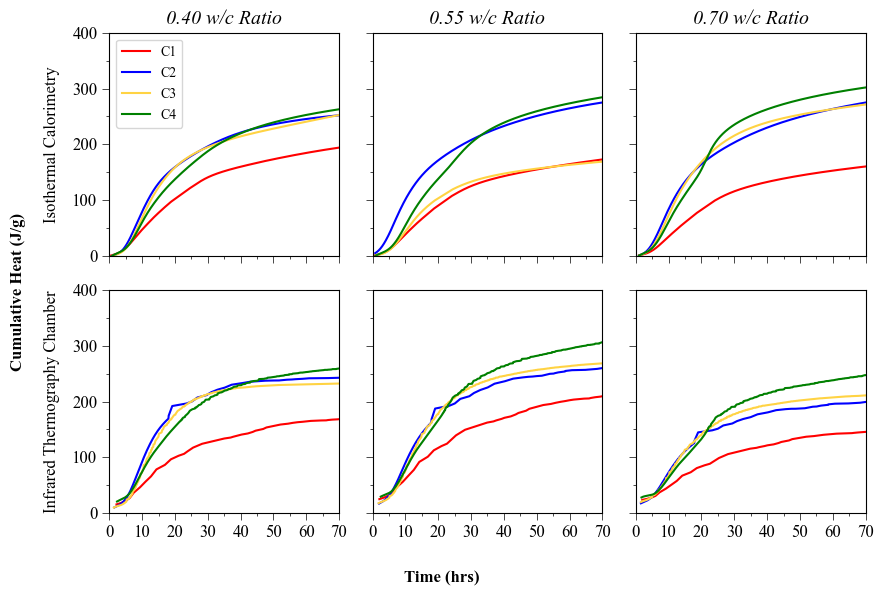

In [18]:
#Datasent Inforamtion
# What is the "name" of the dataset? Cement Paste Data
# Where did you obtain it? I collected the samples
# Where can we obtain it? (i.e., URL): Will be available after first publication.
# What is the license of the dataset? What are we allowed to do with it? None and do not share.
# How big is it in file size and in items? 4,853KB, "231201_Infrared and Isothermal Data_Paste_Diggs_V14_Heat and Cumlative Heat Only.xlsx","Cumulative Heat Cure Nov 2023.ipynb"



import textwrap
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import MultipleLocator

def customize_ticks(ax, x_major, x_minor, y_major, y_minor):
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))
    ax.tick_params(axis='both', which='major', length=5, width=0.5, labelsize=12)
    ax.tick_params(axis='both', which='minor', length=2.5, width=0.5)
    return ax

plt.rc('font', family='Times New Roman', weight='regular', size=12)
lfs = 12

file_path = r'C:\Users\brandyd2\Downloads\231201_Infrared and Isothermal Data_Paste_Diggs_V14_Heat and Cumlative Heat Only.xlsx'
sheets = ['Trial 7_Complete_40_Isocal', 'Trial 7_Complete_55_Isocal', 'Trial 7_Complete_70_Isocal', 
          'Trial 7_Complete_40_Infrared', 'Trial 7_Complete_55_Infrared', 'Trial 7_Complete_70_Infrared']

plot_titles = ['0.40 w/c Ratio', '0.55 w/c Ratio', '0.70 w/c Ratio']



columns_for_plots = [
('Time-c1-iso40', 'Cumulative-c1-iso40', 'Time-c2-iso40', 'Cumulative-c2-iso40', 'Time-c3-iso40', 'Cumulative-c3-iso40', 'Time-c4-iso40', 'Cumulative-c4-iso40'),('Time-c1-iso55', 'Cumulative-c1-iso55', 'Time-c2-iso55', 'Cumulative-c2-iso55', 'Time-c3-iso55', 'Cumulative-c3-iso55', 'Time-c4-iso55', 'Cumulative-c4-iso55'), ('Time-c1-iso70', 'Cumulative-c1-iso70', 'Time-c2-iso70', 'Cumulative-c2-iso70', 'Time-c3-iso70', 'Cumulative-c3-iso70', 'Time-c4-iso70', 'Cumulative-c4-iso70'),
('Time-c1-ir40', 'Cumulative-c1-ir40', 'Time-c2-ir40', 'Cumulative-c2-ir40', 'Time-c3-ir40', 'Cumulative-c3-ir40', 'Time-c4-ir40', 'Cumulative-c4-ir40'),
('Time-c1-ir55', 'Cumulative-c1-ir55', 'Time-c2-ir55', 'Cumulative-c2-ir55', 'Time-c3-ir55', 'Cumulative-c3-ir55', 'Time-c4-ir55', 'Cumulative-c4-ir55'),
('Time-c1-ir70', 'Cumulative-c1-ir70', 'Time-c2-ir70', 'Cumulative-c2-ir70', 'Time-c3-ir70', 'Cumulative-c3-ir70', 'Time-c4-ir70', 'Cumulative-c4-ir70'),   
]
# Colors for each sample category
colors = {'Cumulative-c1-iso40': 'red', 'Cumulative-c2-iso40': 'blue', 'Cumulative-c3-iso40': '#ffd343', 
          'Cumulative-c4-iso40': 'green', 'Cumulative-c1-iso55': 'red', 'Cumulative-c2-iso55': 'blue', 'Cumulative-c3-iso55': '#ffd343', 
          'Cumulative-c4-iso55': 'green','Cumulative-c1-iso70': 'red', 'Cumulative-c2-iso70': 'blue', 'Cumulative-c3-iso70': '#ffd343', 
          'Cumulative-c4-iso70': 'green','Cumulative-c1-ir40': 'red', 'Cumulative-c2-ir40': 'blue', 
          'Cumulative-c3-ir40': '#ffd343', 'Cumulative-c4-ir40': 'green','Cumulative-c1-ir55': 'red', 'Cumulative-c2-ir55': 'blue', 
          'Cumulative-c3-ir55': '#ffd343', 'Cumulative-c4-ir55': 'green', 'Cumulative-c1-ir70': 'red', 'Cumulative-c2-ir70': 'blue', 
          'Cumulative-c3-ir70': '#ffd343', 'Cumulative-c4-ir70': 'green'}

# Define legend labels and colors
legend_labels = {'c1': 'C1', 'c2': 'C2', 'c3': 'C3', 'c4': 'C4'}
legend_colors = {'C1': 'red', 'C2': 'blue', 'C3': '#ffd343', 'C4': 'green'}

fig, axes = plt.subplots(2, 3, figsize=(9, 6))

for i, sheet in enumerate(sheets):
    df = pd.read_excel(file_path, sheet_name=sheet)
    ax = axes[i // 3, i % 3]
    if i // 3 == 0:
        ax.set_title(plot_titles[i % 3], fontstyle='italic')

    time_columns = [col for col in columns_for_plots[i] if 'Time' in col]
    data_columns = [col for col in columns_for_plots[i] if 'Cumulative' in col]

    for time_col, data_col in zip(time_columns, data_columns):
        if time_col in df.columns and data_col in df.columns:
            category = data_col.split('-')[1].split('iso')[0].split('ir')[0]
            label = legend_labels.get(category, category)
            color = legend_colors.get(label, 'black')
            ax.plot(df[time_col], df[data_col], label=label, color=color)

    if i // 3 == 0 and i % 3 == 0:  # First row, first column
        ax.legend(fontsize='small')


    # Set y-axis labels and tick labels
    if i % 3 == 0:  # Only for the first column of each row
        if i // 3 == 0:
            ax.set_ylabel('Isothermal Calorimetry', fontsize=lfs, rotation=90, labelpad=15, ha='center', va='center')
            ax.tick_params(axis='y', labelleft=True)  # Enable y-axis tick labels
        else:
            label_text=('Infrared Thermography Chamber')
            wrapped_label = textwrap.fill(label_text, width=0.1)  # Wrapping the text
            ax.set_ylabel(label_text, fontsize=lfs, rotation=90, labelpad=15, ha='center', va='center')
            ax.tick_params(axis='y', labelleft=True)  # Enable y-axis tick labels
    else:
        ax.set_ylabel('')  # Remove y-label for other columns
        ax.tick_params(axis='y', labelleft=False)  # Disable y-axis tick labels

    # Adjust x-axis tick labels
    if i // 3 == 1:  # Only for the second row
        ax.tick_params(axis='x', labelbottom=True)
    else:
        ax.tick_params(axis='x', labelbottom=False)

    ax = customize_ticks(ax, x_major=10, x_minor=5, y_major=100, y_minor=50)
    ax.set_xlim(0, 70)
    ax.set_ylim(0, 400)


fig.supxlabel('Time (hrs)', fontsize=lfs, weight='bold', color='k')
fig.supylabel('Cumulative Heat (J/g)', fontsize=lfs, weight='bold', color='k')

plt.tight_layout()

filename = os.path.join(r'C:\Users\brandyd2\Downloads', "Cumulative Heat Curve Nov 2023.png")
fig.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()